   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

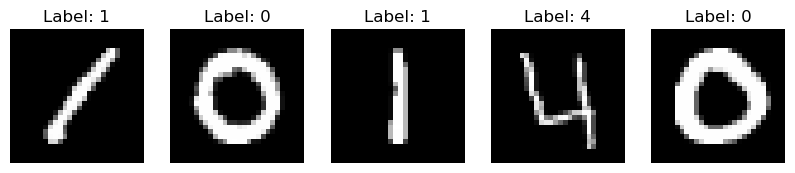

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Explore the data
print(train_df.head())
print(train_df.shape)
print(train_df['label'].value_counts())

# Visualize some examples
def plot_examples(data, labels, num_examples=5):
    fig, axes = plt.subplots(1, num_examples, figsize=(10, 5))
    for i in range(num_examples):
        axes[i].imshow(data.iloc[i, 1:].values.reshape(28, 28), cmap='gray')
        axes[i].set_title(f'Label: {labels[i]}')
        axes[i].axis('off')
    plt.show()

plot_examples(train_df, train_df['label'])


In [10]:
# digit_recognizer.py

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Create results directory if it does not exist
if not os.path.exists('results'):
    os.makedirs('results')

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Separate features and target
X = train_df.drop(columns=['label'])
y = train_df['label']

# Reshape and normalize pixel values
X = X.values.reshape(-1, 28, 28, 1) / 255.0
X = X.astype(np.float32)

# Convert labels to one-hot encoding
y = to_categorical(y, 10)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Make predictions
test_X = test_df.values.reshape(-1, 28, 28, 1) / 255.0
test_X = test_X.astype(np.float32)
predictions = model.predict(test_X)
predicted_labels = np.argmax(predictions, axis=1)

# Create a submission file
submission_df = pd.DataFrame({
    'ImageId': np.arange(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})

# Save the submission file
submission_df.to_csv('results/submission.csv', index=False)
print(f'Submission file saved to results/submission.csv')

# Print accuracy score
val_predictions = np.argmax(model.predict(X_val), axis=1)
val_labels = np.argmax(y_val, axis=1)
print(f'Validation Accuracy: {accuracy_score(val_labels, val_predictions):.4f}')


Epoch 1/10


c:\Users\tusha\anaconda3\envs\tensorflow\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8478 - loss: 0.5203 - val_accuracy: 0.9513 - val_loss: 0.1667
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9617 - loss: 0.1295 - val_accuracy: 0.9619 - val_loss: 0.1273
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9746 - loss: 0.0839 - val_accuracy: 0.9660 - val_loss: 0.1079
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9788 - loss: 0.0639 - val_accuracy: 0.9633 - val_loss: 0.1206
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9854 - loss: 0.0484 - val_accuracy: 0.9704 - val_loss: 0.0994
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9885 - loss: 0.0354 - val_accuracy: 0.9668 - val_loss: 0.1116
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9911 - loss: 0.0288 - val_accuracy: 0.9694 - val_loss: 0.1158
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9921 - loss: 0.0238 - val_accurac

In [11]:
# digit_recognizer.py

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# Create results directory if it does not exist
if not os.path.exists('results'):
    os.makedirs('results')

# Load data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Separate features and target
X = train_df.drop(columns=['label'])
y = train_df['label']

# Reshape and normalize pixel values
X = X.values.reshape(-1, 28, 28, 1) / 255.0
X = X.astype(np.float32)

# Convert labels to one-hot encoding
y = to_categorical(y, 10)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    # Convolutional Layer
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    # Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    # Convolutional Layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    # Flatten Layer
    Flatten(),
    
    # Fully Connected Layers
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Make predictions
test_X = test_df.values.reshape(-1, 28, 28, 1) / 255.0
test_X = test_X.astype(np.float32)
predictions = model.predict(test_X)
predicted_labels = np.argmax(predictions, axis=1)

# Create a submission file
submission_df = pd.DataFrame({
    'ImageId': np.arange(1, len(predicted_labels) + 1),
    'Label': predicted_labels
})

# Save the submission file
submission_df.to_csv('results/submission.csv', index=False)
print(f'Submission file saved to results/submission.csv')

# Print accuracy score
val_predictions = np.argmax(model.predict(X_val), axis=1)
val_labels = np.argmax(y_val, axis=1)
print(f'Validation Accuracy: {accuracy_score(val_labels, val_predictions):.4f}')


Epoch 1/15


c:\Users\tusha\anaconda3\envs\tensorflow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7267 - loss: 0.8478 - val_accuracy: 0.9705 - val_loss: 0.1050
Epoch 2/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9516 - loss: 0.1787 - val_accuracy: 0.9810 - val_loss: 0.0687
Epoch 3/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9659 - loss: 0.1317 - val_accuracy: 0.9813 - val_loss: 0.0708
Epoch 4/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9693 - loss: 0.1079 - val_accuracy: 0.9830 - val_loss: 0.0587
Epoch 5/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9768 - loss: 0.0887 - val_accuracy: 0.9849 - val_loss: 0.0514
Epoch 6/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9801 - loss: 0.0803 - val_accuracy: 0.9837 - val_loss: 0.0615
Epoch 7/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9819 - loss: 0.0733 - val_accuracy: 0.9851 - val_loss: 0.0617
Epoch 8/15
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9820 - loss: 0.0674 - val_accurac